In [55]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install skyfield


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
csv = pd.read_csv("log_tinygs.csv", sep=";")
datetime3 = pd.to_datetime(csv['TOA (UTC+3)'])
datetime0 = pd.to_datetime(csv['TOA (UTC+0)'])
illuminated = csv['Illuminated'].astype('bool')
rtc = csv['RTC']
print(rtc)

0        69020
1        69020
2        69020
3        69075
4        69075
         ...  
4487    191699
4488    191709
4489    191729
4490    191754
4491    191789
Name: RTC, Length: 4492, dtype: int64


(844, 1921, 0, 30375)


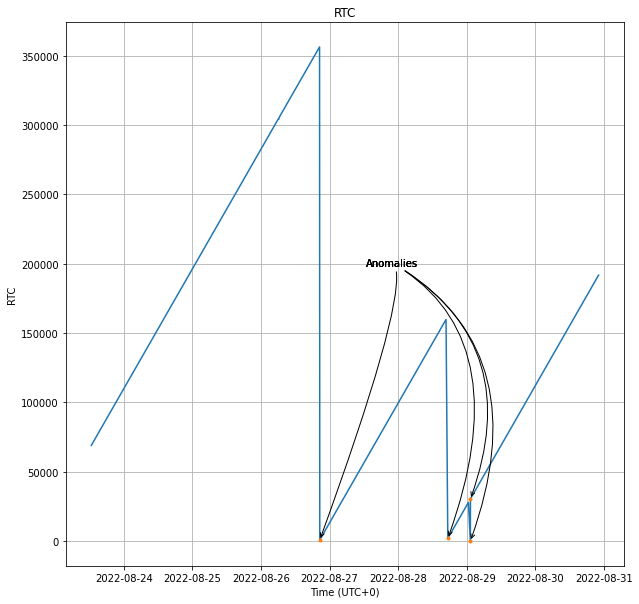

In [3]:
plt.figure(figsize=(10,10))
plt.plot(datetime0, rtc)
plt.title("RTC")
plt.xlabel("Time (UTC+0)")
plt.ylabel("RTC")
plt.grid(True)
time_anomalies, anomalies = zip(*[x for i, x in enumerate(zip(datetime0, rtc)) if np.abs(rtc.diff()[i]) > 20000])
print(anomalies)
plt.plot(time_anomalies, anomalies, '.')
for t, a in zip(time_anomalies, anomalies):
    plt.annotate("Anomalies", (t, a), xytext=(300, 300), textcoords='axes points',  arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=-30,angleB=70"))
plt.savefig("RTC.png")

In [4]:
from skyfield.api import load, wgs84, EarthSatellite
from skyfield.timelib import utc

In [5]:
def draw_polar_track(timeAnomalies, anomaliesValue, tleLine1, tleLine2, name):
    ts = load.timescale()
    satellite = EarthSatellite(tleLine1, tleLine2, 'Polytech_Universe-1', ts)
    print(satellite)
    t0 = ts.from_datetime(pd.Timestamp(timeAnomalies.timestamp() - anomaliesValue, unit='s').replace(tzinfo=utc))
    t1 = ts.from_datetime(pd.Timestamp(timeAnomalies.timestamp(), unit='s').replace(tzinfo=utc))

    timeline = ts.linspace(t0, t1, 500)

    geocentric = satellite.at(timeline)
    lat, lon = wgs84.latlon_of(geocentric)

    fig = plt.figure(figsize=(10,10))
    if (lat.degrees[0] < 0):
        plt.polar(lon.radians, lat.degrees)
        plt.polar(lon.radians[0], lat.degrees[0], 'o')
        plt.annotate("Suspected crash location", (lon.radians[0], lat.degrees[0]),
                     xytext=(10, -10), textcoords='offset points')
        plt.polar([135.866 / 180 * np.pi, 107.3 / 180 * np.pi], [-64.081, -80.7], 'o')
        plt.annotate("South geomagnetic pole", (107.3 / 180 * np.pi, -80.7),
                     xytext=(5, 5), textcoords='offset points')
        plt.annotate("South magnetic pole", (135.866 / 180 * np.pi, -64.081),
                     xytext=(5, 5), textcoords='offset points')
    else:
        plt.polar(lon.radians, -lat.degrees)
        plt.polar(lon.radians[0], -lat.degrees[0], 'o')
        plt.annotate("Suspected crash location", (lon.radians[0], -lat.degrees[0]),
                     xytext=(10, -10), textcoords='offset points')
        plt.polar([72.7 / 180 * np.pi, -162.867 / 180 * np.pi], [-80.7, -86.494], 'o')
        plt.annotate("North geomagnetic pole", (72.7 / 180 * np.pi, -80.7),
                     xytext=(5, 5), textcoords='offset points')
        plt.annotate("North magnetic pole", (-162.867 / 180 * np.pi, -86.494),
                     xytext=(5, 5), textcoords='offset points')
    plt.title(name)
    plt.savefig(name + ".png")

Polytech_Universe-1 catalog #53371 epoch 2022-08-26 10:58:50 UTC
Polytech_Universe-1 catalog #53371 epoch 2022-08-28 11:50:12 UTC


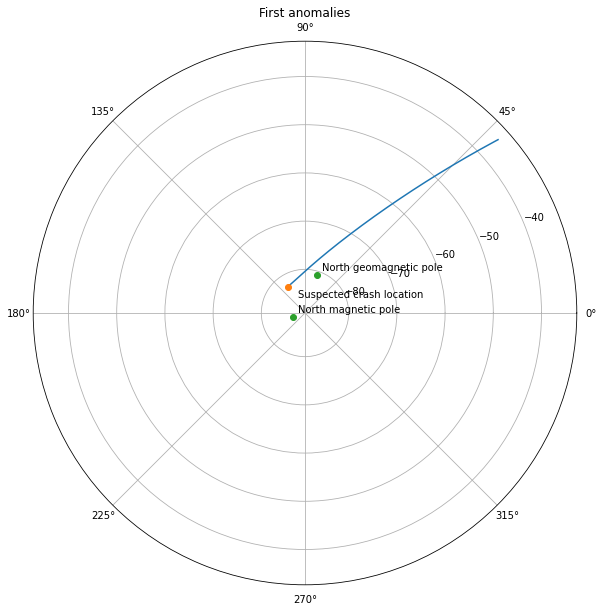

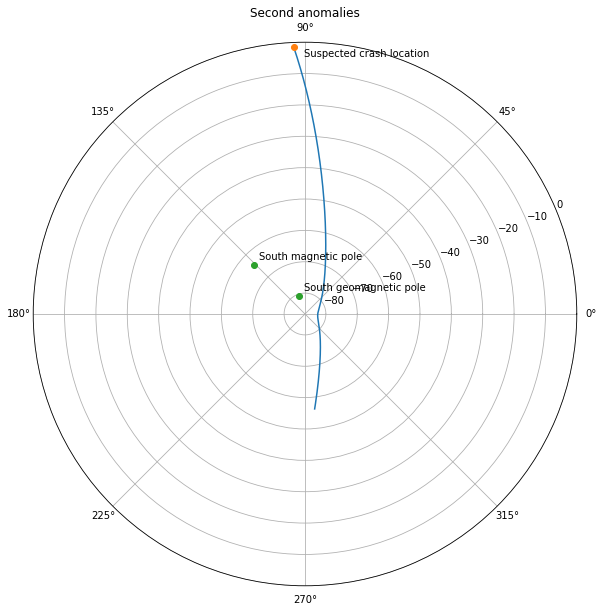

In [6]:
#For first anomaly
#1 53371U 22096B   22238.45751998  .00002996  00000-0  12493-3 0  9991
#2 53371  97.4359 139.7954 0003281 106.3324   8.1006 15.24465536  2636

#For second anomaly
#1 53371U 22096B   22240.49319912  .00002597  00000-0  10865-3 0  9992
#2 53371  97.4356 141.8151 0003228  98.8249  20.4295 15.24474492  2940

line11 = '1 53371U 22096B   22238.45751998  .00002996  00000-0  12493-3 0  9991'
line12 = '2 53371  97.4359 139.7954 0003281 106.3324   8.1006 15.24465536  2636'
draw_polar_track(time_anomalies[0], anomalies[0], line11, line12, "First anomalies")
line21 = '1 53371U 22096B   22240.49319912  .00002597  00000-0  10865-3 0  9992'
line22 = '2 53371  97.4356 141.8151 0003228  98.8249  20.4295 15.24474492  2940'
draw_polar_track(time_anomalies[1], anomalies[1], line21, line22, "Second anomalies")